# Linear Regression

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [58]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

** I am splitting, standardizing, and then adding column of ones to account for bias **

In [59]:
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [60]:
X = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

In [62]:
X_train.head()

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
13066,363,-43,-0.27,-0.04,0.28,0.9,-15,13,-0.005,-0.1,0.027,0.027,0.027,0.025,0.025,0.022,0.022,0.022,0.022,0.022,0.022,0.022,0.022,0.022,0.000,0.0,0.002,0.0,0.002,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.022
12973,-317,-3,0.28,-0.13,0.88,0.3,-6,18,0.001,0.1,0.021,0.020,0.020,0.020,0.020,0.020,0.020,0.020,0.020,0.020,0.020,0.020,0.020,0.020,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.020
849,-229,-53,0.30,0.02,1.51,-1.3,-13,3,0.012,-0.2,0.036,0.036,0.036,0.036,0.036,0.036,0.036,0.036,0.036,0.036,0.036,0.039,0.039,0.042,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,-0.004,0.0,-0.004,0.0,1.2,0.042
10361,-205,2,-0.48,0.14,0.73,0.5,-9,-6,-0.027,-0.5,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.020,0.020,0.020,-0.001,0.0,0.000,0.0,0.000,0.0,0.0,0.0,-0.001,0.0,-0.001,0.0,-0.001,0.0,0.5,0.020
13535,-23,22,-0.19,0.05,0.55,-0.5,-8,-3,-0.002,0.0,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019


In [63]:
mean = X_train.mean(axis=0)
print("     Mean of each column \n\n", mean)

     Mean of each column 

 inputs ClimbRate   -1.152755e+01
Sgz                -1.257555e+01
P                   6.604545e-03
Q                   6.161182e-02
CurPitch            6.301764e-01
CurRoll             6.632727e-02
AbsRoll            -1.106109e+01
DiffClb            -9.327273e-01
DiffRollRate       -1.033091e-03
DiffDiffClb        -5.431818e-02
SeTime1             2.191264e-02
SeTime2             2.192891e-02
SeTime3             2.192882e-02
SeTime4             2.193936e-02
SeTime5             2.193918e-02
SeTime6             2.195327e-02
SeTime7             2.195364e-02
SeTime8             2.197400e-02
SeTime9             2.197391e-02
SeTime10            2.199191e-02
SeTime11            2.199182e-02
SeTime12            2.200718e-02
SeTime13            2.200745e-02
SeTime14            2.201918e-02
DiffSeTime1        -1.370909e-04
DiffSeTime2         9.090909e-08
DiffSeTime3        -5.545455e-05
DiffSeTime4        -9.090909e-08
DiffSeTime5        -7.318182e-05
DiffSeTime6    

In [64]:
std_dev = X_train.std(axis=0)
print("Standard deviation of each column \n\n", std_dev)

Standard deviation of each column 

 inputs ClimbRate    261.496767
Sgz                  25.822665
P                     0.304478
Q                     0.118776
CurPitch              0.314801
CurRoll               0.970676
AbsRoll               4.146632
DiffClb              10.442036
DiffRollRate          0.013277
DiffDiffClb           1.117733
SeTime1               0.006883
SeTime2               0.006913
SeTime3               0.006913
SeTime4               0.006917
SeTime5               0.006917
SeTime6               0.006926
SeTime7               0.006926
SeTime8               0.006933
SeTime9               0.006933
SeTime10              0.006948
SeTime11              0.006947
SeTime12              0.006957
SeTime13              0.006958
SeTime14              0.006960
DiffSeTime1           0.000703
DiffSeTime2           0.000010
DiffSeTime3           0.000446
DiffSeTime4           0.000029
DiffSeTime5           0.000488
DiffSeTime6           0.000044
DiffSeTime7           0.000562
Di

In [65]:
X_train = (X_train - mean)/std_dev
X_valid = (X_valid - mean)/std_dev

In [66]:
X_train['bias_feature'] = np.ones(np.shape(X_train)[0])
X_valid['bias_feature'] = np.ones(np.shape(X_valid)[0])

In [67]:
X_train

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,bias_feature
13066,1.432245,-1.178207,-0.908454,-0.855493,-1.112375,0.858858,-0.949906,1.334292,-0.298775,-0.040870,0.739085,0.733543,0.733579,0.442455,0.442534,0.006747,0.006694,0.003750,0.003763,0.001165,0.001178,-0.001032,-0.001071,-0.002756,0.195090,-0.009535,4.606227,0.003178,4.246101,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.121624,-0.002769,1.0
12973,-1.168169,0.370819,0.897914,-1.613224,0.793593,0.240732,1.220530,1.813126,0.153126,0.138064,-0.132586,-0.279020,-0.279016,-0.280360,-0.280368,-0.282026,-0.282056,-0.284709,-0.284705,-0.286705,-0.286702,-0.288504,-0.288517,-0.290100,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.121624,-0.290076,1.0
849,-0.831645,-1.565464,0.963600,-0.350339,2.794860,-1.407604,-0.467586,0.376625,0.981611,-0.130337,2.046592,2.035409,2.035487,2.032648,2.032918,2.028154,2.027944,2.022965,2.023037,2.016253,2.016332,2.442480,2.442218,2.870689,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,-6.083789,0.011988,-6.323306,0.01101,2.929366,2.870307,1.0
10361,-0.739866,0.564448,-1.598158,0.659968,0.317101,0.446774,0.497052,-0.485276,-1.955745,-0.398737,-0.423144,-0.423672,-0.423672,-0.424923,-0.424948,-0.426412,-0.426431,-0.428939,-0.428938,-0.430640,-0.430641,-0.288504,-0.288517,-0.290100,-1.227979,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,-1.457324,0.003218,-1.404388,0.011988,-1.464661,0.01101,-0.630122,-0.290076,1.0
13535,-0.043872,1.338961,-0.645709,-0.097763,-0.254689,-0.583436,0.738211,-0.197976,-0.072825,0.048597,-0.423144,-0.423672,-0.423672,-0.424923,-0.424948,-0.426412,-0.426431,-0.428939,-0.428938,-0.430640,-0.430641,-0.432240,-0.432240,-0.433773,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.433730,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.082114,0.293368,-0.448651,-0.350339,-0.349988,-0.686457,0.255892,0.568158,0.002492,-0.577671,-0.713701,-0.712976,-0.712985,-0.714049,-0.714109,-0.715185,-0.715181,-0.717398,-0.717406,-0.718510,-0.718520,-0.719712,-0.719686,-0.721117,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.721038,1.0
5192,0.942756,-0.171340,-0.908454,0.659968,-0.000560,0.652816,0.979371,0.185091,-0.449409,-2.098606,1.320199,1.312150,1.312205,1.309833,1.310016,1.306223,1.306069,1.301817,1.301868,1.296578,1.296634,1.292592,1.292435,1.290294,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,1.403871,1.290116,1.0
12172,0.105269,1.764944,1.587618,1.838660,0.094738,0.343753,-2.396863,-0.581043,-0.750676,-0.577671,0.448528,0.444239,0.444266,0.442455,0.442534,0.439906,0.439819,0.436439,0.436465,0.432969,0.432997,0.430176,0.430097,0.428261,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,0.386875,0.428193,1.0
235,1.485783,0.912979,-1.368257,-0.855493,-1.588867,0.652816,1.220530,1.334292,-0.072825,-1.651272,-0.713701,-0.712976,-0.712985,-0.714049,-0.714109,-0.715185,-0.715181,-0.717398,-0.717406,-0.718510,-0.718520,-0.719712,-0.719686,-0.721117,0.195090,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.721038,1.0


In [68]:
X_valid

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,bias_feature
12870,0.678890,1.067881,0.536641,0.912545,-0.635883,0.240732,0.255892,-0.964110,0.529710,-1.561805,-0.132586,-0.134368,-0.134359,-0.135797,-0.135787,-0.137639,-0.137681,-0.140480,-0.140471,-0.142770,-0.142762,-0.144768,-0.144794,-0.146428,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.121624,-0.146422,1.0
11578,0.055555,-0.636048,0.306739,-0.855493,-0.413520,0.137711,0.738211,0.568158,0.153126,-0.040870,-0.568422,-0.568324,-0.568329,-0.569486,-0.569528,-0.570798,-0.570806,-0.573169,-0.573172,-0.574575,-0.574581,-0.575976,-0.575963,-0.577445,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.577384,1.0
2255,0.101445,-0.016437,-1.105512,-0.434532,0.761827,-1.510625,0.979371,0.472391,0.077809,-0.756604,1.320199,1.312150,1.312205,1.309833,1.310016,1.306223,1.306069,1.301817,1.301868,1.296578,1.296634,1.292592,1.292435,1.290294,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,1.403871,1.290116,1.0
12386,0.254411,0.061014,-0.711396,1.838660,0.857126,-0.583436,-0.708746,-1.921778,0.379076,0.406464,1.610756,1.601454,1.601517,1.598959,1.599177,1.883768,1.883569,1.878735,1.878803,1.872318,1.872393,1.867536,1.867327,1.864983,0.19509,-0.009535,0.124272,0.003178,-3.946332,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,1.912370,1.864731,1.0
7083,-0.361276,0.293368,0.273896,-1.192262,-0.064093,0.858858,0.255892,0.663925,-0.600042,0.495931,-0.713701,-0.712976,-0.712985,-0.714049,-0.714109,-0.715185,-0.715181,-0.717398,-0.717406,-0.718510,-0.718520,-0.719712,-0.719686,-0.721117,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.721038,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12608,-0.055345,-0.558597,0.963600,-0.266147,-0.000560,-0.892499,-0.708746,0.663925,0.605027,-0.040870,-0.132586,-0.134368,-0.134359,-0.135797,-0.135787,-0.137639,-0.137681,-0.140480,-0.140471,-0.142770,-0.142762,-0.144768,-0.144794,-0.146428,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.121624,-0.146422,1.0
1042,1.202797,-2.185075,-0.908454,-1.108070,-0.508818,1.064900,-0.467586,1.142759,-1.503844,0.406464,0.884363,0.878194,0.878235,0.876144,0.876275,0.873064,0.872944,0.869128,0.869166,0.864774,0.864815,0.861384,0.861266,0.859278,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,0.895373,0.859154,1.0
9063,0.510628,-1.449287,0.438111,-0.855493,-0.762948,0.446774,1.220530,0.568158,-0.072825,0.227530,-0.713701,-0.712976,-0.712985,-0.714049,-0.714109,-0.715185,-0.715181,-0.717398,-0.717406,-0.718510,-0.718520,-0.719712,-0.719686,-0.721117,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,0.159406,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.630122,-0.721038,1.0
10310,-1.619418,-1.178207,1.094973,-0.855493,1.079489,0.858858,-0.226427,1.430059,1.056928,-0.309270,-0.423144,-0.423672,-0.423672,-0.424923,-0.424948,-0.426412,-0.426431,-0.284709,-0.284705,-0.286705,-0.286702,-0.288504,-0.288517,-0.290100,0.19509,-0.009535,0.124272,0.003178,0.149884,0.014565,-3.400938,0.0,0.162416,0.003218,0.155413,0.011988,0.154888,0.01101,-0.121624,-0.290076,1.0


In order to make a prediction in linear regression, we multiply every observation of the dataset with the weights of every column, and then add the bias. In order to reduce the computation steps and make the calculation more efficient, we can add a column of 1s which has the size of the rows in our dataset. While performing gradient descent, we can calculate the weight of that column of 1s as well. This can be the bias. 

That is why we add the 1s to our dataset, so that we can calculate the bias.


## Linear Regression Using Direct Solution 

In [69]:
from sklearn.metrics import mean_squared_error
from scipy import linalg

# Calculate the direct solution using our equation w = (X^TX)^{-1}X^T t
w_direct = np.dot(linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train)) #has shape (2,1)

# make our prediction
y_pred_train_dir = np.dot(X_train, w_direct) #has shape (n, 1)
y_pred_val_dir = np.dot(X_valid, w_direct) #has shape (n, 1)




In [70]:
w_direct.shape

(41,)

In [71]:
y_pred_train_dir

array([-0.00116235, -0.00072488, -0.00134071, ..., -0.00175101,
       -0.00040953, -0.0007719 ])

In [72]:
RMSE_direct_train = np.sqrt(mean_squared_error(y_pred_train_dir, np.array(y_train).reshape(-1,1)))
RMSE_direct_val = np.sqrt(mean_squared_error(y_pred_val_dir, np.array(y_valid).reshape(-1,1)))

In [73]:
print("RMSE of the training dataset with direct solution", RMSE_direct_train)

RMSE of the training dataset with direct solution 0.00017792889855393516


In [74]:
print("RMSE of the validation dataset with direct solution", RMSE_direct_val)

RMSE of the validation dataset with direct solution 0.00017128170249302617


## Full Batch Gradient Descent

In [105]:
import time
start_time = time.time() ## Records current time

a = 0.01
w_gd = ((np.random.random(41))/10000).reshape(-1,1)
rmse_val_gd = []
rmse_train_gd = []
epoch = 0                 
while RMSE_direct_val:
  y_pred_train_gd = np.dot(X_train, w_gd) 
  y_pred_val_gd = np.dot(X_valid, w_gd)
  rmse_train_gd.append(np.sqrt(mean_squared_error(y_pred_train_gd, np.array(y_train).reshape(-1,1))))
  rmse_val_gd.append(np.sqrt(mean_squared_error(y_pred_val_gd, np.array(y_valid).reshape(-1,1))))
  gradient = (1/len(X_train) * np.dot(X_train.T, y_pred_train_gd - np.array(y_train).reshape(-1,1)))
  w_gd = w_gd - a * gradient
  epoch+=1
  if(rmse_val_gd[epoch-1] <= 1.001*RMSE_direct_val):
    break

print("Total Training Time: %s (s)" % (time.time() - start_time))
print("Total number of epochs", epoch)

Total Training Time: 2.1377742290496826 (s)
Total number of epochs 884


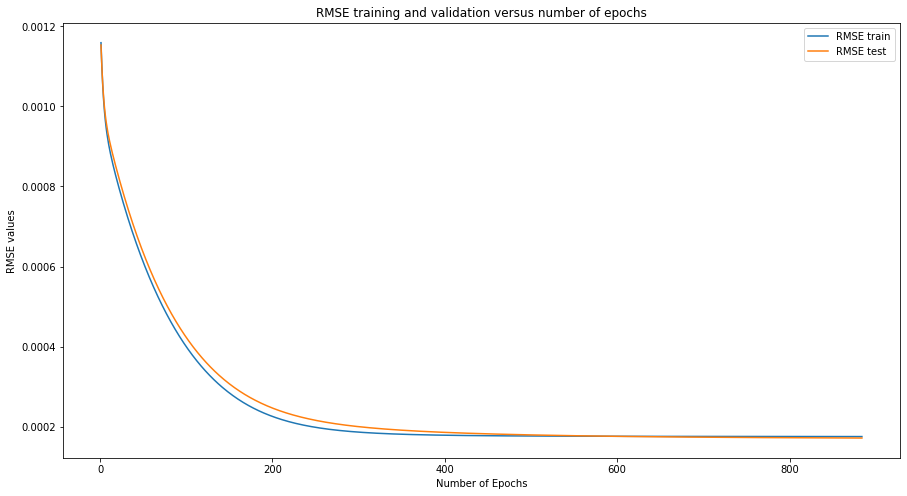

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize = [15,8])
plt.plot(range(1,epoch+1), rmse_train_gd, label = 'RMSE train')
plt.plot(range(1,epoch+1), rmse_val_gd, label = 'RMSE test')
plt.xlabel("Number of Epochs")
plt.ylabel("RMSE values")
plt.title("RMSE training and validation versus number of epochs")
plt.legend()
plt.show()

In the beginning, we can see that there is some underfitting. The training and test errors are higher. But, as the number of epochs increases, the errors are reducing. Eventually, the RMSE values converge and that is fitted normally. 

## Mini-batch and Stochastic Gradient Descent

In [77]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

last_time = []

def mini_batch(x_train, Y_train, x_val, y_val, batch_size_n, a, CT ):

  import warnings
  warnings.filterwarnings("ignore", message="overflow encountered")
  warnings.filterwarnings("ignore", message="invalid value encountered")

  w = ((np.random.random(41))/10000).reshape(-1,1) #initializing weights 

  rmse_train=[]
  rmse_val=[]
  rmse_train_main=[]
  rmse_val_main=[]
  time_list = []
  time_list_final = []
  epoch_number = []
  no_of_batches = x_train.shape[0]//batch_size_n
  start_time = time.time()
  converged = "no"

  for epoch in range (0, 5000): 

    rmse_train_check = 0 #keeping max values of RMSE to check if RMSE keeps getting larger 
    sum_of_size = 0

    c=0 # counter for RMSE, if continues to become larger 

    rand_indices = np.random.permutation(len(x_train)) #shuffling the dataset

    X_train = np.array(x_train)
    X_train = X_train[rand_indices]

    Y_train = np.array(Y_train)
    y_train = Y_train[rand_indices]

    for i in range(no_of_batches):

      #splitting the dataset
      min_x_train = X_train[i*batch_size_n:(i+1)*batch_size_n]
      sum_of_size = sum_of_size + len(min_x_train)
      min_y_train= y_train[i*batch_size_n:(i+1)*batch_size_n].reshape(-1,1)

      z = np.dot(min_x_train, w)
      gradient = (1/len(min_x_train) * np.dot(min_x_train.T, z-min_y_train)).reshape(1,-1)
      w = w - a* gradient.T

    if sum_of_size < len(X_train): #if some data is left over after splitting 

      min_x_train = X_train[sum_of_size:]
      min_y_train = y_train[sum_of_size:].reshape(-1,1)
      z = np.dot(min_x_train, w)
      gradient = (1/len(min_x_train) * np.dot(min_x_train.T, z-min_y_train)).reshape(1,-1)     
      w = w - a* gradient.T
      
    try:
      
      #updating RMSE values 
      y_pred_val = np.dot(x_val, w)
      rmse_train.append(np.sqrt(mean_squared_error(z, min_y_train)))
      r_train = np.sqrt(mean_squared_error(z, min_y_train))
      rmse_val.append(np.sqrt(mean_squared_error(y_pred_val, np.array([y_val]).reshape(-1, 1))))
      r_val = np.sqrt(mean_squared_error(y_pred_val, np.array([y_val]).reshape(-1, 1)))
      current_time = time.time() - start_time
      time_list.append(current_time)

      #counting the number of RMSE values that are larger than the previous ones 
      if rmse_train_check<=r_train:
        rmse_train_check = r_train 
        c = c+1

      #checking for threshold 
      if r_val <= CT:
        rmse_val_main = rmse_val
        rmse_train_main = rmse_train
        time_list_final=time_list
        converged = 'Yes'
        print ("Converged")        
        last_time.append(current_time)
        break
  
      #check if RMSE does not convereg based on the counts updated
      if c>20:
        print ("Not converged")
        break 

    except:
      print ("Not converged")
      break

  if epoch == 4999:
    print ("Does not converge even after 5000 epoch")  

  return w, rmse_val_main, rmse_train_main, time_list_final, converged

In [78]:
CT = 1.001*RMSE_direct_val

In [79]:
list_batch_size = [1, 2, 4, 8, 16, 128, 256, 512, 1024, 2048, 4096]

RMSE_train = []
RMSE_val = []
time_list = []
batches = []
converged = 'Nan'

for i in list_batch_size:
  print ("Batch size for mini-batch gradient descent: ",i)
  w, RMSE_valid, RMSE_tr, Time_final, converged = mini_batch(X_train, y_train, X_valid, y_valid, i, 0.01, CT )
  if(converged == 'Yes'):
    batches.append(i)
    RMSE_train.append(RMSE_tr)
    RMSE_val.append(RMSE_valid)
    time_list.append(Time_final)



Batch size for mini-batch gradient descent:  1
Not converged
Batch size for mini-batch gradient descent:  2
Not converged
Batch size for mini-batch gradient descent:  4
Not converged
Batch size for mini-batch gradient descent:  8
Not converged
Batch size for mini-batch gradient descent:  16
Not converged
Batch size for mini-batch gradient descent:  128
Converged
Batch size for mini-batch gradient descent:  256
Converged
Batch size for mini-batch gradient descent:  512
Converged
Batch size for mini-batch gradient descent:  1024
Converged
Batch size for mini-batch gradient descent:  2048
Converged
Batch size for mini-batch gradient descent:  4096
Converged


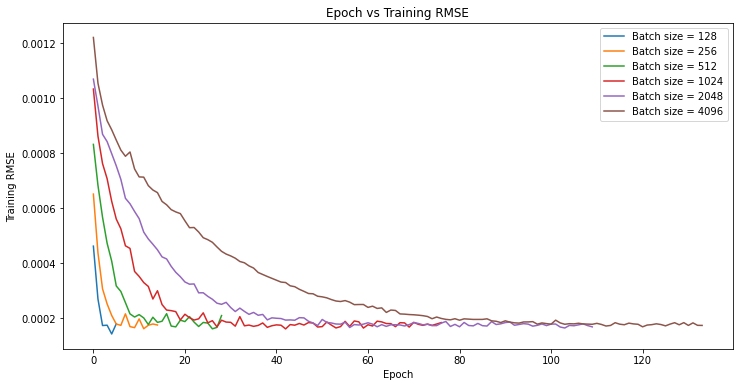

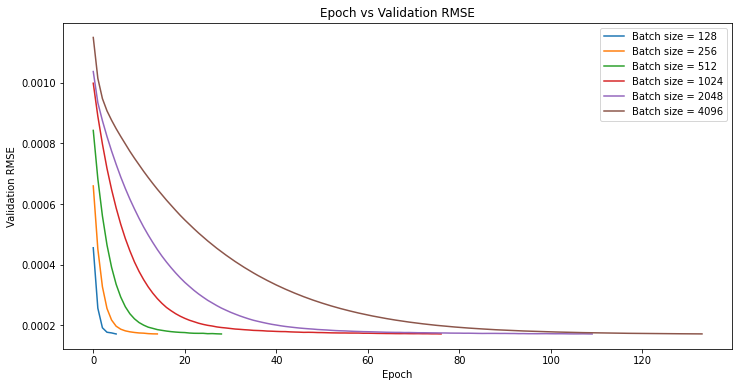

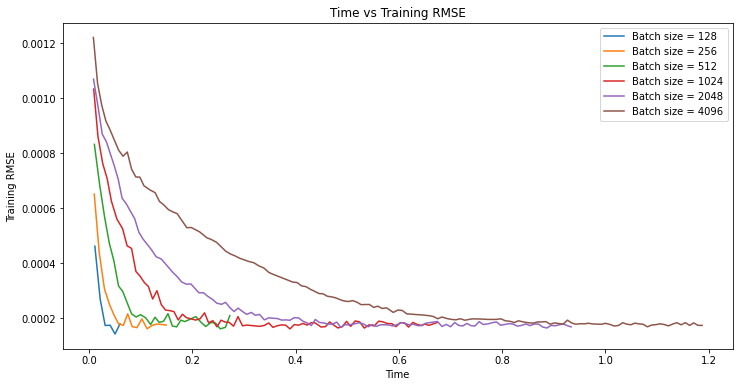

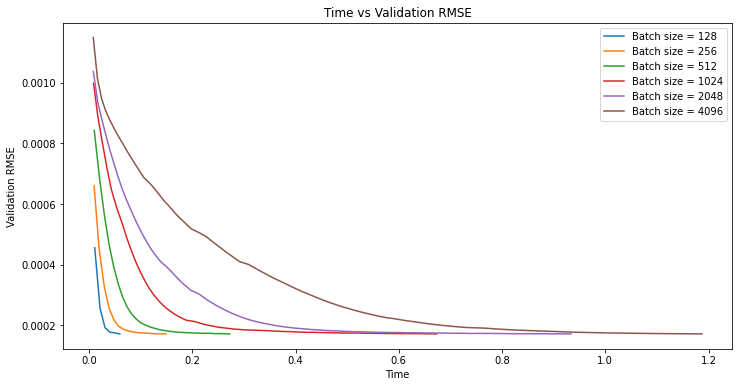

In [80]:
fig, ax = plt.subplots(figsize=(12, 6))
for i in range (len(RMSE_train)):
  ax.plot(RMSE_train[i],label ='Batch size = {:d}'.format(batches[i]))
  ax.set_xlabel("Epoch")
  ax.set_ylabel("Training RMSE")
  ax.set_title("Epoch vs Training RMSE")
  plt.legend()
plt.show()

fig, ax1 = plt.subplots(figsize=(12, 6))
for i in range (len(RMSE_val)):
  ax1.plot(RMSE_val[i],label ='Batch size = {:d}'.format(batches[i]) )
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Validation RMSE")
  ax1.set_title("Epoch vs Validation RMSE")
  plt.legend()
plt.show()

fig, ax2 = plt.subplots(figsize=(12, 6))
for i in range (len(time_list)):
  ax2.plot(time_list[i], RMSE_train[i], label ='Batch size = {:d}'.format(batches[i]) )
  ax2.set_xlabel("Time")
  ax2.set_ylabel("Training RMSE")
  ax2.set_title("Time vs Training RMSE")
  plt.legend()
plt.show()

fig, ax3 = plt.subplots(figsize=(12, 6))
for i in range (len(time_list)):
  ax3.plot(time_list[i],RMSE_val[i],label ='Batch size = {:d}'.format(batches[i]) )
  ax3.set_xlabel("Time")
  ax3.set_ylabel("Validation RMSE")
  ax3.set_title("Time vs Validation RMSE")
  plt.legend()
plt.show()

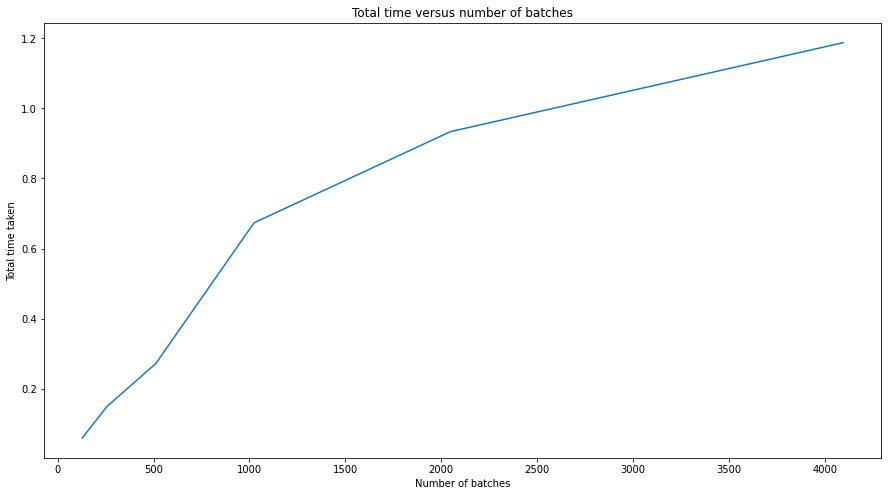

In [82]:
#Total time versus number of batches 
plt.figure(figsize = [15,8])
plt.plot(batches, last_time)
plt.xlabel("Number of batches")
plt.ylabel("Total time taken")
plt.title("Total time versus number of batches")
plt.show()

**MAIN TAKEAWAYS **

1. Training curves are more noisy than the validation curves 
2. As the number of batches increases, the curve becomes more smoother and less L-shaped.
3. The number of epochs for converging increases as the number of batches increases. 
4. However, for small number of batches it does not converge
5. The time taken for higher batch sizes to converge is more as the number of epochs required for convergence is more. 
6. Based on the time taken for convergence and the number of epochs required for convergence, we can conclude that batch 128 works best. The period for which it experiences underfitting is also less.

## Weight Decay Regularization 

In [83]:
last_time.clear()

In [84]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

last_time_reg = []

def mini_batch_reg(x_train, Y_train, x_val, y_val, batch_size_n, a, CT, Lambda):

  import warnings
  warnings.filterwarnings("ignore", message="overflow encountered")
  warnings.filterwarnings("ignore", message="invalid value encountered")

  weight = ((np.random.random(41))/10000).reshape(-1,1) ### Inital weights

  converged = "no"
  rmse_train=[]
  rmse_val=[]
  rmse_train_main=[]
  rmse_val_main=[]
  time_list = []
  time_list_final = []
  epoch_number = []
  no_of_batches = x_train.shape[0]//batch_size_n
  start_time = time.time()

  for epoch in range (0, 5000):

    rmse_train_check = 0 #keeping max values of RMSE to check if RMSE keeps getting larger 
    c=0

    #shuffling the dataset
    rand_indices = np.random.permutation(len(x_train))
    X_train = np.array(x_train)
    X_train = X_train[rand_indices]
    Y_train = np.array(Y_train)
    y_train = Y_train[rand_indices]


    for i in range(no_of_batches):
            
      min_x_train = X_train[i*batch_size_n:(i+1)*batch_size_n]
      min_y_train= y_train[i*batch_size_n:(i+1)*batch_size_n].reshape(-1,1)
      z = np.dot(min_x_train,weight)
      gradient = (1/len(min_x_train) * np.dot(min_x_train.T, z-min_y_train)).reshape(1,-1) 
      weight = (1 - a*Lambda)*weight - a* gradient.T 

    try:

      #updating RMSE values 
      y_pred_val = np.dot(x_val, weight)
      rmse_train.append(np.sqrt(mean_squared_error(z, min_y_train)))
      r_train = np.sqrt(mean_squared_error(z, min_y_train))
      rmse_val.append(np.sqrt(mean_squared_error(y_pred_val, np.array([y_val]).reshape(-1, 1))))
      r_val = np.sqrt(mean_squared_error(y_pred_val, np.array([y_val]).reshape(-1, 1)))
      current_time = time.time() - start_time
      time_list.append(current_time)

      #counting the number of RMSE values that are larger than the previous ones    
      if rmse_train_check<=r_train:
        rmse_train_check = r_train 
        c = c+1

      #checking for threshold 
      if r_val <= CT:
        rmse_val_main = rmse_val
        rmse_train_main = rmse_train
        time_list_final=time_list
        print ("Converged")   
        converged = 'Yes'     
        last_time_reg.append(current_time)
        break

      #check if RMSE does not convereg based on the counts updated
      if c>10:
        print ("Not converged")
        break 

    except Exception as e: 
      print ("Not converged")
      print(str(e))
      break

  if epoch == 4999:
    print ("Does not converge even after 5000 epoch")  

  return weight, rmse_train_main, rmse_val_main, time_list_final, converged

In [85]:
RMSE_train_reg = []
RMSE_val_reg = []
time_list_reg = []
lambda_reg = []
Lambda = np.arange(0,0.05,0.003)

for i in Lambda:
  print ("lambda value",i)
  w, RMSE_tr_reg, RMSE_valid_reg, Time_final_reg, converged_reg = mini_batch_reg(X_train, y_train, X_valid, y_valid, 128, 0.01, CT, i)

  if(converged_reg == 'Yes'):
    lambda_reg.append(i)
    RMSE_train_reg.append(RMSE_tr_reg)
    RMSE_val_reg.append(RMSE_valid_reg)
    time_list_reg.append(Time_final_reg)


lambda value 0.0
Converged
lambda value 0.003
Converged
lambda value 0.006
Converged
lambda value 0.009000000000000001
Converged
lambda value 0.012
Converged
lambda value 0.015
Converged
lambda value 0.018000000000000002
Converged
lambda value 0.021
Converged
lambda value 0.024
Converged
lambda value 0.027
Converged
lambda value 0.03
Converged
lambda value 0.033
Does not converge even after 5000 epoch
lambda value 0.036000000000000004
Does not converge even after 5000 epoch
lambda value 0.039
Does not converge even after 5000 epoch
lambda value 0.042
Does not converge even after 5000 epoch
lambda value 0.045
Does not converge even after 5000 epoch
lambda value 0.048
Does not converge even after 5000 epoch


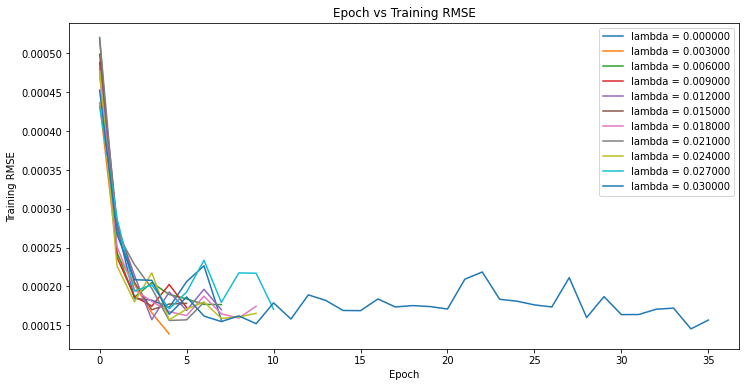

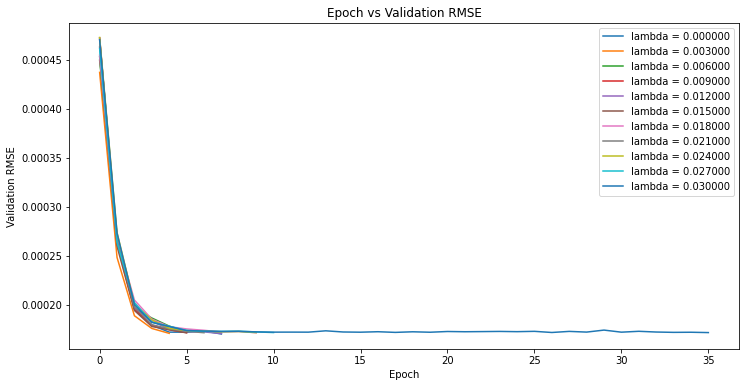

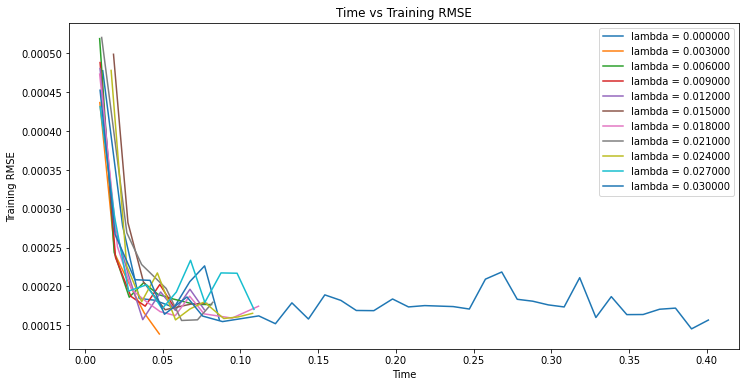

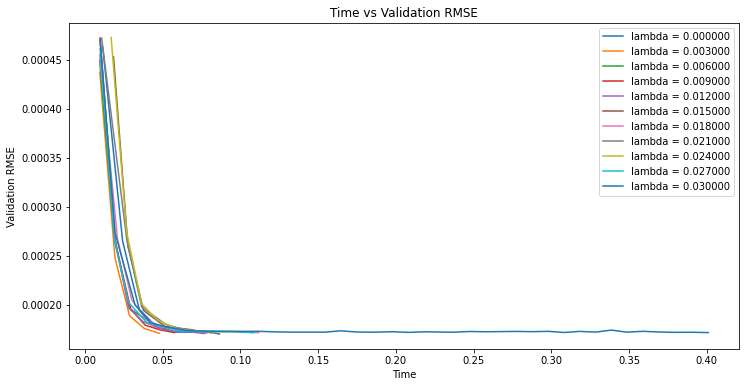

In [86]:
fig, ax = plt.subplots(figsize=(12, 6))
for i in range (len(RMSE_train_reg)):
  ax.plot(RMSE_train_reg[i],label ='lambda = {:f}'.format(Lambda[i]))
  ax.set_xlabel("Epoch")
  ax.set_ylabel("Training RMSE")
  ax.set_title("Epoch vs Training RMSE")
  plt.legend()
plt.show()

fig, ax1 = plt.subplots(figsize=(12, 6))
for i in range (len(RMSE_val_reg)):
  ax1.plot(RMSE_val_reg[i],label ='lambda = {:f}'.format(Lambda[i]) )
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Validation RMSE")
  ax1.set_title("Epoch vs Validation RMSE")
  plt.legend()
plt.show()

fig, ax2 = plt.subplots(figsize=(12, 6))
for i in range (len(time_list_reg)):
  ax2.plot(time_list_reg[i],RMSE_train_reg[i],label ='lambda = {:f}'.format(Lambda[i]) )
  ax2.set_xlabel("Time")
  ax2.set_ylabel("Training RMSE")
  ax2.set_title("Time vs Training RMSE")
  plt.legend()
plt.show()

fig, ax3 = plt.subplots(figsize=(12, 6))
for i in range (len(time_list_reg)):
  ax3.plot(time_list_reg[i],RMSE_val_reg[i],label ='lambda = {:f}'.format(Lambda[i]) )
  ax3.set_xlabel("Time")
  ax3.set_ylabel("Validation RMSE")
  ax3.set_title("Time vs Validation RMSE")
  plt.legend()
plt.show()

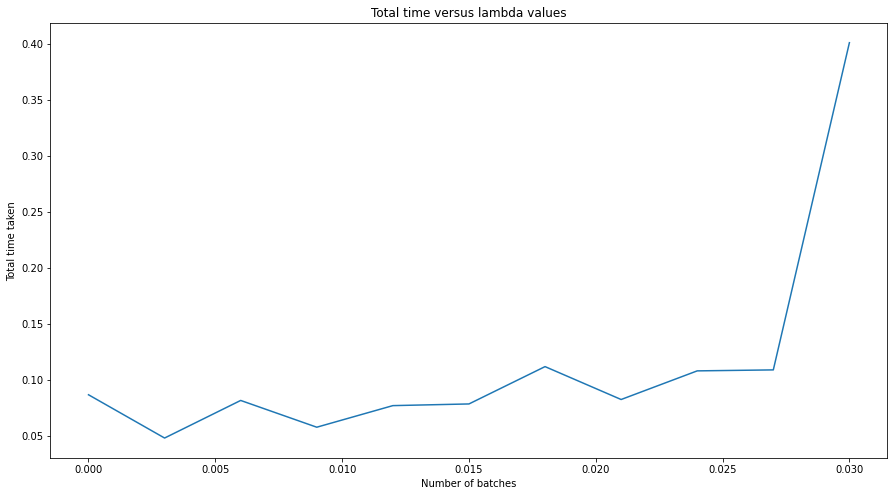

In [87]:
#to find out which model works best
plt.figure(figsize = [15,8])
plt.plot(lambda_reg, last_time_reg)
plt.xlabel("Number of batches")
plt.ylabel("Total time taken")
plt.title("Total time versus lambda values")
plt.show()

**MAIN TAKEAWAYS **

1. Training curves are more noisy than the validation curves 
2. With higher values of lambda, training curves get more noisier. And, after a certain value of lambda (0.03), the RMSE no longer converges.
3. The number of epochs for converging increases as the value of lambda increases. 
4. However, the number of epochs is significantly lower as opposed to performing mini batch gradient descent without regularization.
5. The time taken for models with lower lambda to converge is less as the number of epochs required for convergence is less. 
6. Based on the time taken for convergence and the number of epochs required for convergence, we can conclude that batch 128 with a lambda value of 0.003 works best. The period for which it experiences underfitting is also less.

## Finalizing a model 

1. Direct solutions have lower RMSE values for both training and validation sets. However, in general direct solutions are computationally expensive because we need to calculate the matrix inverse. 
2. Full batch gradient descent takes 971 epochs for the RMSE validation values to converge. 
3. In mini-batch gradient descent, batch size 128 is the batch which converges in the least amount of time. Taking that batch and applying weight decay regularization, we see with a lambda value of 0.003, we get the fastest RMSE convergence. 
4. So, the best model in my opinion would be mini-batch gradient descent with a batch size of 128 and lambda value of 0.03

In [96]:
print("Batch size - 128")
weight_final, RMSE_tr_final, RMSE_valid_final, Time_finalised, converged_final = mini_batch_reg(X_train, y_train, X_valid, y_valid, 128, 0.01, CT, 0.003)

Batch size - 128
Converged


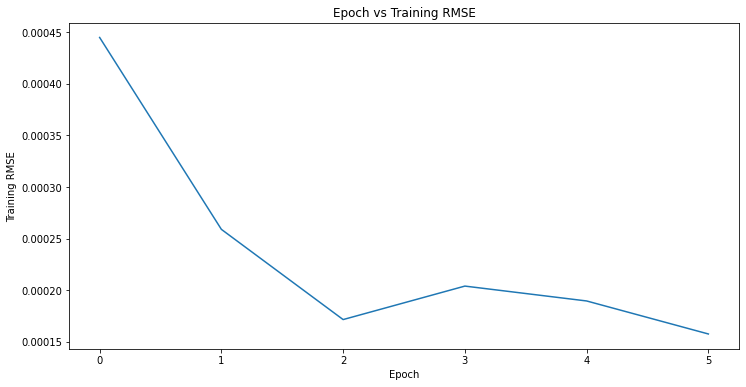

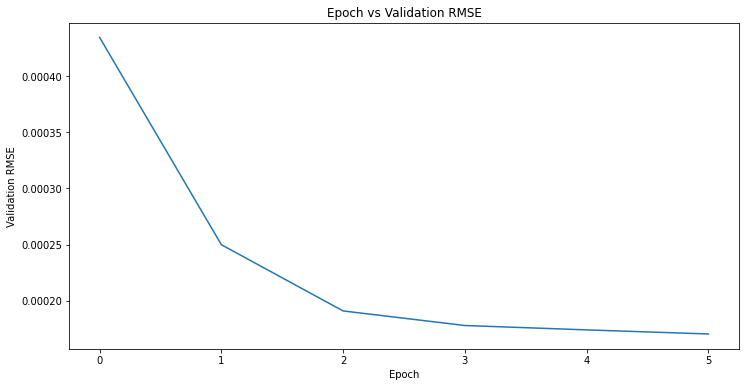

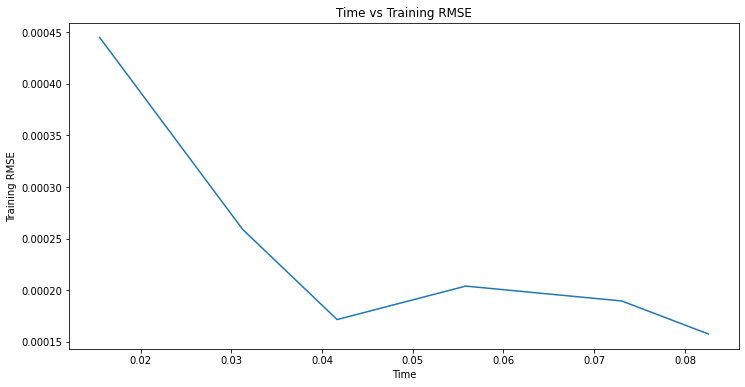

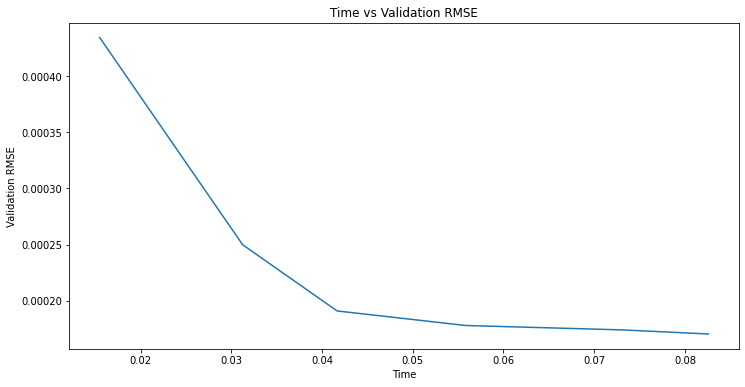

In [97]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(RMSE_tr_final)
ax.set_xlabel("Epoch")
ax.set_ylabel("Training RMSE")
ax.set_title("Epoch vs Training RMSE")
plt.show()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(RMSE_valid_final)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Validation RMSE")
ax1.set_title("Epoch vs Validation RMSE")
plt.show()

fig, ax2 = plt.subplots(figsize=(12, 6))
ax2.plot(Time_finalised,RMSE_tr_final)
ax2.set_xlabel("Time")
ax2.set_ylabel("Training RMSE")
ax2.set_title("Time vs Training RMSE")
plt.show()

fig, ax3 = plt.subplots(figsize=(12, 6))
ax3.plot(Time_finalised, RMSE_valid_final)
ax3.set_xlabel("Time")
ax3.set_ylabel("Validation RMSE")
ax3.set_title("Time vs Validation RMSE")
plt.show()


Pros
1. Linear regression is pretty powerful in predicting the continuous target values with very good accuracy. This is seen from the low RMSE errors for our best model. 

2. Linear regression also handles overfitting by regularization, enabling addition of model complexity and better understanding of the dataset.

3. The final model chosen is also very fast and converges within 5 epochs. Hence, it is pretty efficient. 

Cons:

1. Linear regression can be quite noisy. This is visible with our training data curves. 

2. It is also prone to overfitting, but it is controlled by regularization. 

3. Our model would be pretty sensitive to outliers too. 




In [104]:
#making predictions

y_pred_train_final = np.dot(X_train, weight_final)
y_pred_val_final = np.dot(X_valid, weight_final)
rmse_train_final = np.sqrt(mean_squared_error(y_pred_train_final, np.array([y_train]).reshape(-1,1)))
rmse_val_final = np.sqrt(mean_squared_error(y_pred_val_final, np.array([y_valid]).reshape(-1, 1)))

print("RMSE of training data", rmse_train_final)
print("RMSE of training data", rmse_val_final)

RMSE of training data 0.0001759343022113363
RMSE of training data 0.0001704929316179982
